In [1]:
import numpy as np
import awkward as ak
from distributed import Client
import matplotlib.pyplot as plt
import mplhep
import pandas as pd
import coffea.util
import re
import os
from coffea.nanoevents import NanoEventsFactory, ScoutingNanoAODSchema
from collections import defaultdict
import uproot

from coffea import processor
import hist
from hist import Hist
from coffea.analysis_tools import PackedSelection

plt.style.use(mplhep.style.CMS)

In [164]:
fname = "root://eosuser.cern.ch//eos/user/a/adlintul/ScoutingPFRun3/Run2022F/230114_155334/0000/nanoaod_109.root"

events = NanoEventsFactory.from_root(
    fname,
    treepath="Events",
    schemaclass=ScoutingNanoAODSchema,
).events()

In [170]:
L1 = ["DoubleMu_12_5", "DoubleMu_15_7", "DoubleMu4p5er2p0_SQ_OS_Mass_Min7", "DoubleMu4p5er2p0_SQ_OS_Mass_7to18", "DoubleMu4_SQ_OS_dR_Max1p2", "DoubleMu4p5_SQ_OS_dR_Max1p2", "HTT200er", "HTT255er", "HTT280er", "HTT320er", "HTT360er", "HTT400er", "HTT450er", "ETT2000", "SingleJet180", "SingleJet200", "DoubleJet30er2p5_Mass_Min300_dEta_Max1p5", "DoubleJet30er2p5_Mass_Min330_dEta_Max1p5", "DoubleJet30er2p5_Mass_Min360_dEta_Max1p5", "SingleLooseIsoEG28er2p1", "SingleLooseIsoEG28er1p5", "SingleLooseIsoEG30er1p5", "SingleIsoEG28er2p1", "SingleIsoEG30er2p1", "SingleIsoEG32er2p1", "DoubleEG_LooseIso16_LooseIso12_er1p5", "DoubleEG_LooseIso18_LooseIso12_er1p5", "DoubleEG_LooseIso20_LooseIso12_er1p5", "DoubleEG_LooseIso22_LooseIso12_er1p5"]

In [172]:
for l in L1:
    print(l, " : ", ak.any(events.L1[l]))

DoubleMu_12_5  :  False
DoubleMu_15_7  :  True
DoubleMu4p5er2p0_SQ_OS_Mass_Min7  :  True
DoubleMu4p5er2p0_SQ_OS_Mass_7to18  :  True
DoubleMu4_SQ_OS_dR_Max1p2  :  True
DoubleMu4p5_SQ_OS_dR_Max1p2  :  True
HTT200er  :  True
HTT255er  :  True
HTT280er  :  False
HTT320er  :  False
HTT360er  :  True
HTT400er  :  True
HTT450er  :  True
ETT2000  :  True
SingleJet180  :  True
SingleJet200  :  True
DoubleJet30er2p5_Mass_Min300_dEta_Max1p5  :  True
DoubleJet30er2p5_Mass_Min330_dEta_Max1p5  :  True
DoubleJet30er2p5_Mass_Min360_dEta_Max1p5  :  True
SingleLooseIsoEG28er2p1  :  False
SingleLooseIsoEG28er1p5  :  False
SingleLooseIsoEG30er1p5  :  False
SingleIsoEG28er2p1  :  False
SingleIsoEG30er2p1  :  True
SingleIsoEG32er2p1  :  True
DoubleEG_LooseIso16_LooseIso12_er1p5  :  False
DoubleEG_LooseIso18_LooseIso12_er1p5  :  True
DoubleEG_LooseIso20_LooseIso12_er1p5  :  True
DoubleEG_LooseIso22_LooseIso12_er1p5  :  True


In [167]:
events.L1.fields

['AlwaysTrue',
 'BPTX_AND_Ref1_VME',
 'BPTX_AND_Ref3_VME',
 'BPTX_AND_Ref4_VME',
 'BPTX_BeamGas_B1_VME',
 'BPTX_BeamGas_B2_VME',
 'BPTX_BeamGas_Ref1_VME',
 'BPTX_BeamGas_Ref2_VME',
 'BPTX_NotOR_VME',
 'BPTX_OR_Ref3_VME',
 'BPTX_OR_Ref4_VME',
 'BPTX_RefAND_VME',
 'BptxMinus',
 'BptxOR',
 'BptxPlus',
 'BptxXOR',
 'CDC_SingleMu_3_er1p2_TOP120_DPHI2p618_3p142',
 'DoubleEG10_er1p2_dR_Max0p6',
 'DoubleEG10p5_er1p2_dR_Max0p6',
 'DoubleEG11_er1p2_dR_Max0p6',
 'DoubleEG4_er1p2_dR_Max0p9',
 'DoubleEG4p5_er1p2_dR_Max0p9',
 'DoubleEG5_er1p2_dR_Max0p9',
 'DoubleEG5p5_er1p2_dR_Max0p8',
 'DoubleEG6_er1p2_dR_Max0p8',
 'DoubleEG6p5_er1p2_dR_Max0p8',
 'DoubleEG7_er1p2_dR_Max0p8',
 'DoubleEG7p5_er1p2_dR_Max0p7',
 'DoubleEG8_er1p2_dR_Max0p7',
 'DoubleEG8er2p5_HTT260er',
 'DoubleEG8er2p5_HTT280er',
 'DoubleEG8er2p5_HTT300er',
 'DoubleEG8er2p5_HTT320er',
 'DoubleEG8er2p5_HTT340er',
 'DoubleEG8p5_er1p2_dR_Max0p7',
 'DoubleEG9_er1p2_dR_Max0p7',
 'DoubleEG9p5_er1p2_dR_Max0p6',
 'DoubleEG_15_10_er2p5',
 'Double

In [137]:
_sigtriggers = {
            '2022F': [
                'SingleJet180'
            ]
        }

trigger = np.zeros(len(events), dtype=bool)
for tname in _sigtriggers["2022F"]:
    print(tname)
    if tname in events.L1.fields:
        print(tname)
        trigger |= ak.to_numpy(events.L1[tname])
        
ak.any(trigger)

SingleJet180
SingleJet180


True

In [139]:
_reftriggers = {
            '2022F': [
                'HLTMuon_Run3_PFScoutingPixelTracking'
            ]
        }

reftrigger = np.zeros(len(events), dtype=bool)
for tname in _reftriggers["2022F"]:
    print(tname)
    if tname in events.DST.fields:
        print(tname)
        reftrigger |= ak.to_numpy(events.DST[tname])
        
ak.any(reftrigger)

HLTMuon_Run3_PFScoutingPixelTracking


False

In [140]:
jet = ak.firsts(events.ScoutingJet[
            (events.ScoutingJet.pt > 15)
            & (abs(events.ScoutingJet.eta) < 2.5)
            #& ak.all(events.Jet.metric_table(muons) > 0.4, axis=-1)  # default metric: delta_r
        ])

In [141]:
jet_exists = ~ak.is_none(jet) & reftrigger

jet_exists

<Array [False, False, False, ... False, False] type='1410 * bool'>

In [142]:
ak.sum(jet_exists)

0

In [143]:
ak.sum(events.L1.SingleJet180)

170

In [211]:
def PackedSelection_any(self, *names):
    consider = 0
    for name in names:
        idx = self._names.index(name)
        consider |= 1 << idx
    return (self._data & consider) != 0

class TriggerProcessor(processor.ProcessorABC):
    def __init__(self, year="2022F"):
        self._year = year
        self._sigtriggers = {
            '2022F': [
                'SingleJet180'
            ]
        }
        self._reftriggers = {
            '2022F': [
                'SingleIsoEG30er2p1'
            ]
        }
        
    @property
    def accumulator(self):
        return {
                "nevents": defaultdict(float),
                "trigger": (
                            Hist.new.StrCategory(
                                [], name="dataset", label="Dataset name", growth=True
                            ).StrCategory(
                                [], name="trigger", label="Trigger name", growth=True
                            ).Reg(
                                100, 0, 1000, name="pt", label="Leading jet $p_T$"
                            ).Reg(
                                100, 0, 300, name="mass", label="Leading jet mass"
                            ).Double()
                        ),

                }

    def process(self, events):
        
        output = self.accumulator
        
        dataset = events.metadata['dataset']
        #print(dataset)
        output["nevents"][dataset] += len(events)
        
        trigger = np.zeros(len(events), dtype=bool)
        for tname in _sigtriggers["2022F"]:
            if tname in events.L1.fields:
                trigger |= ak.to_numpy(events.L1[tname])

        reftrigger = np.zeros(len(events), dtype=bool)
        for tname in self._reftriggers[self._year]:
            if tname in events.L1.fields:
                reftrigger |= ak.to_numpy(events.L1[tname])
                
        muons = events.ScoutingMuon[
            (events.ScoutingMuon.pt > 25)
            & (abs(events.ScoutingMuon.eta) < 2.4)
        ]
        
        jet = ak.firsts(events.ScoutingFatJet[
            (events.ScoutingFatJet.pt > 100)
            & (abs(events.ScoutingFatJet.eta) < 2.5)
            #& ak.all(events.Jet.metric_table(muons) > 0.4, axis=-1)  # default metric: delta_r
        ])
        
        jet_exists = ~ak.is_none(jet) & reftrigger
        #print("Jet exists: ", ak.sum(jet_exists))

        output["trigger"].fill(
            dataset = dataset,
            pt = jet[jet_exists].pt,
            mass = jet[jet_exists].mass,
            trigger="none",
        )
        
        cut = jet_exists & trigger
        #print("Jet exist and signal trigger: ", ak.sum(cut))
        
        output["trigger"].fill(
            dataset=dataset,
            pt=jet[cut].pt,
            mass = jet[cut].mass,
            trigger="any",
        )
        
        return output

    def postprocess(self, accumulator):
        return accumulator

In [176]:
import json

fileset = {}

with open("../input/Data_Run2Summer22.json") as fin:
    fileset = json.load(fin)
    
with open("../input/QCD_Run2Summer22.json") as fin:
    fileset.update(json.load(fin))

In [56]:
fileset = {
    "data" : [
        "root://eosuser.cern.ch//eos/user/a/adlintul/ScoutingPFRun3/Run2022F/230114_155334/0000/nanoaod_109.root"
    ],
    "mc" : [
        "root://eosuser.cern.ch//eos/user/a/adlintul/QCD_PT-120to170_TuneCP5_13p6TeV_pythia8/Run3Summer22/230114_094511/0000/nanoaod_10.root"
    ]
}

In [174]:
# run the processor

from coffea import processor, util

futures_run = processor.Runner(
    executor = processor.FuturesExecutor(compression=None, workers=2),
    schema = ScoutingNanoAODSchema,
    maxchunks = 10,
)

out = futures_run(
    fileset,
    "Events",
    processor_instance=TriggerProcessor()
)

Output()

KeyboardInterrupt: 

In [ ]:
out

In [212]:
from distributed import Client
from lpcjobqueue import LPCCondorCluster

from dask.distributed import performance_report
from dask_jobqueue import HTCondorCluster, SLURMCluster

env_extra = [
    f"export PYTHONPATH=$PYTHONPATH:{os.getcwd()}",
]

cluster = LPCCondorCluster(
    ship_env=True,
)

cluster.adapt(minimum=1, maximum=100)
client = Client(cluster)

print("Waiting for at least one worker...")
client.wait_for_workers(1)

uproot.open.defaults["xrootd_handler"] = uproot.source.xrootd.MultithreadedXRootDSource

output = processor.run_uproot_job(
            fileset,
            "Events",
            processor_instance=TriggerProcessor(),
            executor=processor.dask_executor,
            executor_args={
                "schema": ScoutingNanoAODSchema,
                "savemetrics": True,
                "retries": 3,
                "client": client,
            },
            chunksize=10000,
            #maxchunks=args.max,
        )

/opt/conda/lib/python3.8/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36625 instead
  warnings.warn(


Waiting for at least one worker...


In [178]:
output[0]

{'nevents': defaultdict(float,
             {'Run2022F': 97907881.0,
              'QCD_PT-120to170': 1461225.0,
              'QCD_PT-600toInf': 1000000.0,
              'QCD_PT-470to600': 976760.0,
              'QCD_PT-300to470': 951294.0}),
 'trigger': Hist(
   StrCategory(['Run2022F', 'QCD_PT-120to170', 'QCD_PT-600toInf', 'QCD_PT-470to600', 'QCD_PT-300to470'], growth=True, name='dataset', label='Dataset name'),
   StrCategory(['none', 'any'], growth=True, name='trigger', label='Trigger name'),
   Regular(100, 0, 1000, name='pt', label='Leading jet $p_T$'),
   Regular(100, 0, 100, name='mass', label='Leading jet mass'),
   storage=Double()) # Sum: 62809459.0 (62971760.0 with flow)}

In [201]:
ptproj = (
    out["trigger"]
    .project("dataset", "mass", "trigger")[[hist.loc('QCD_PT-120to170'), hist.loc('QCD_PT-300to470'), hist.loc('QCD_PT-470to600'), hist.loc('QCD_PT-600toInf')], :, :]
)[{"dataset" : sum}]

ptproj

Hist(
  Regular(100, 0, 100, name='mass', label='Leading jet mass'),
  StrCategory(['none', 'any'], growth=True, name='trigger', label='Trigger name'),
  storage=Double()) # Sum: 5608540.0 (5677296.0 with flow)

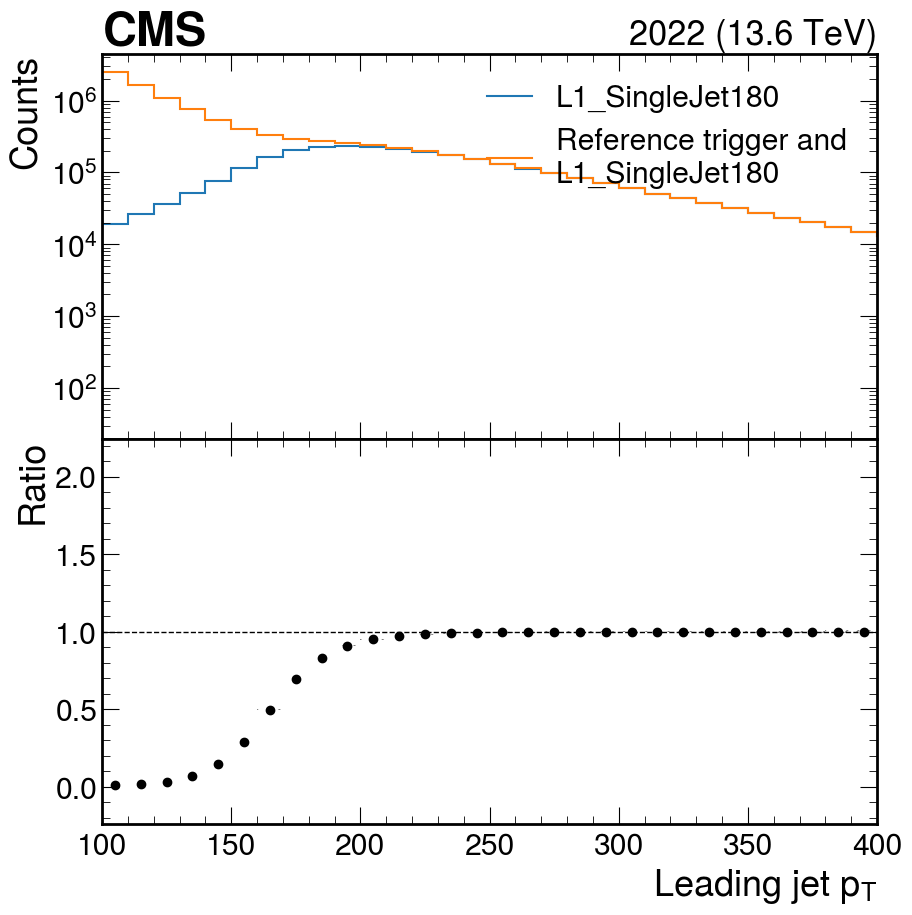

In [224]:
# here we plot the ratio of (require the minimum AND that the jet passed a signal trigger)/(only require the minimum)
# sample: data
# variable: pt

out = output[0]

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,10), sharex=True)
fig.subplots_adjust(hspace=0)

ptproj = (
    out["trigger"]
    .project("dataset", "pt", "trigger")[hist.loc('Run2022F'), :, :] #[[hist.loc('QCD_PT-120to170'), hist.loc('QCD_PT-300to470'), hist.loc('QCD_PT-470to600'), hist.loc('QCD_PT-600toInf')], :, :]
) #[{"dataset" : sum}]

denom = ptproj[:, hist.loc("none")]
num = ptproj[:, hist.loc("any")]
main_ax_artists, sublot_ax_arists = num.plot_ratio(
    denom,
    rp_ylabel=r"Ratio",
    rp_num_label="L1_SingleJet180",
    rp_denom_label="Reference trigger and\nL1_SingleJet180",
    rp_uncert_draw_type="bar",
    ax_dict={"main_ax" : ax1, "ratio_ax" : ax2}
)

ax1.set_xlabel('')
ax1.set_yscale('log')
ax1.set_xlim(100,400)
mplhep.cms.label(ax=ax1, data=True, year="2022", rlabel="2022 (13.6 TeV)")

plt.savefig("ak8_data_pt_zoom.png")

In [242]:
from coffea.hist import clopper_pearson_interval

num = (
    out["trigger"]
    .project("pt", "mass", "trigger", "dataset")[::hist.rebin(2), ::hist.rebin(2), hist.loc("any"), hist.loc('Run2022F')]
)

denom = (
    out["trigger"]
    .project("pt", "mass", "trigger", "dataset")[::hist.rebin(2), ::hist.rebin(2), hist.loc("none"), hist.loc('Run2022F')]
)

rdata = (
    num.view() 
    / np.maximum(1, denom.view())
)

rdata_unc = clopper_pearson_interval(
    num.view(),
    denom.view(),
)

In [243]:
num = (
    out["trigger"]
    .project("pt", "mass", "trigger", "dataset")[::hist.rebin(2), ::hist.rebin(2), hist.loc("any"), [hist.loc('QCD_PT-120to170'), hist.loc('QCD_PT-300to470'), hist.loc('QCD_PT-470to600'), hist.loc('QCD_PT-600toInf')]]
)[{"dataset" : sum}]

denom = (
    out["trigger"]
    .project("pt", "mass", "trigger", "dataset")[::hist.rebin(2), ::hist.rebin(2), hist.loc("any"), [hist.loc('QCD_PT-120to170'), hist.loc('QCD_PT-300to470'), hist.loc('QCD_PT-470to600'), hist.loc('QCD_PT-600toInf')]]
)[{"dataset" : sum}]

rmc = (
    num.view() 
    / np.maximum(1, denom.view())
)

rmc_unc = clopper_pearson_interval(
    num.view(),
    denom.view(),
)

In [244]:
scalefactor = rdata / np.where(rmc == 0, 1., rmc)
scalefactor_up = rdata_unc[1] / np.where(rmc_unc[0] == 0, np.inf, rmc_unc[0])
scalefactor_dn = rdata_unc[0] / np.where(rmc_unc[1] == 0, 1., rmc_unc[1])
x = num.copy()
y = x.copy()
x[...] = (scalefactor_up - scalefactor_dn) / 2 / scalefactor
y[...] = scalefactor

/tmp/ipykernel_22394/1257522860.py:6: RuntimeWarning: divide by zero encountered in divide
  x[...] = (scalefactor_up - scalefactor_dn) / 2 / scalefactor
/tmp/ipykernel_22394/1257522860.py:6: RuntimeWarning: invalid value encountered in divide
  x[...] = (scalefactor_up - scalefactor_dn) / 2 / scalefactor


(exptext: Custom Text(0.0, 1, 'CMS'), expsuffix: Custom Text(0.0, 1.005, ''))

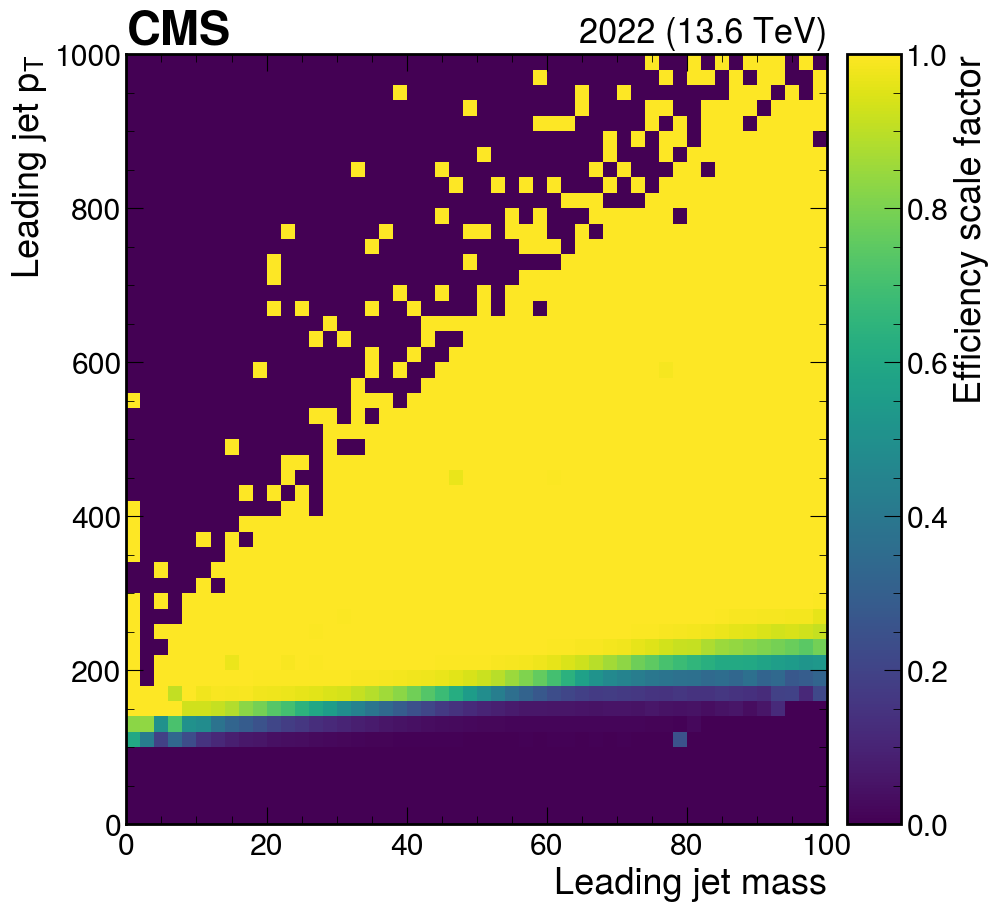

In [245]:
fig, ax = plt.subplots()

artist = mplhep.hist2dplot(y.project(1, 0), ax=ax, cmin=0, cmax=2)
artist.cbar.set_label("Efficiency scale factor")
mplhep.cms.label(ax=ax, data=True, year="2022", rlabel="2022 (13.6 TeV)")

(exptext: Custom Text(0.0, 1, 'CMS'), expsuffix: Custom Text(0.0, 1.005, ''))

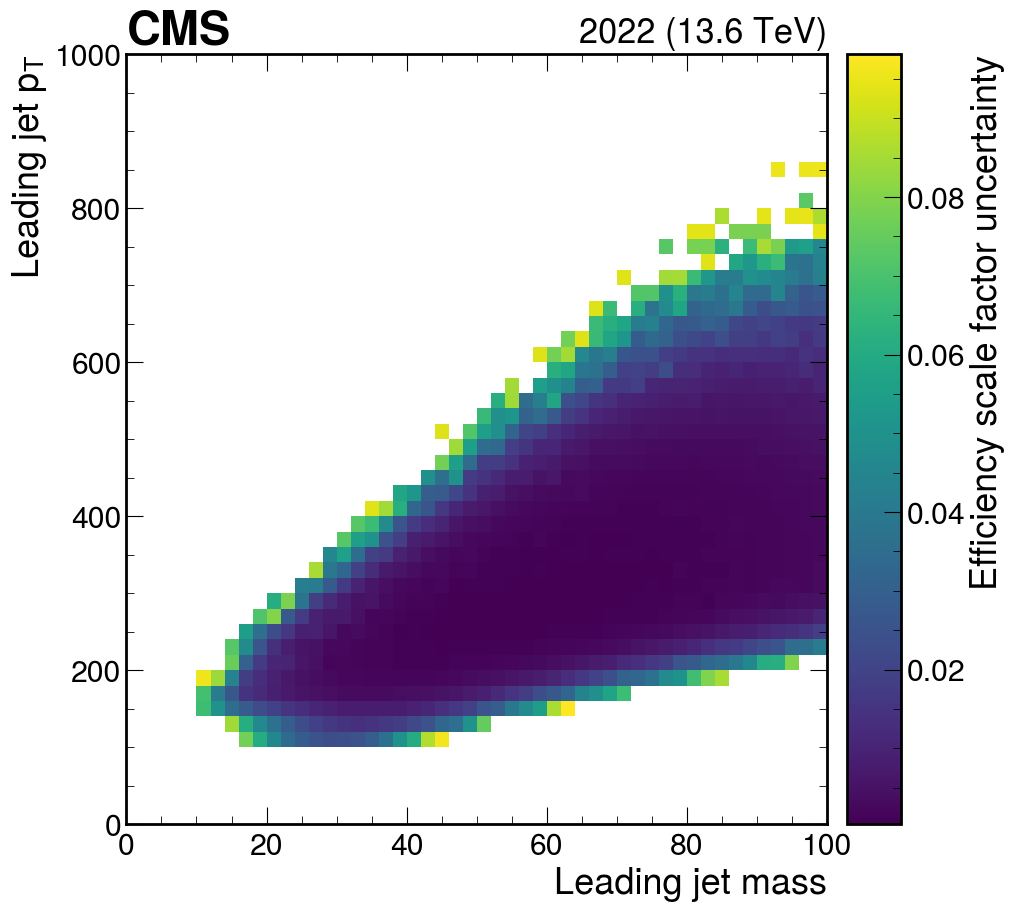

In [246]:
fig, ax = plt.subplots()

artist = mplhep.hist2dplot(x.project(1, 0), ax=ax, cmin=0, cmax=0.1)
artist.cbar.set_label("Efficiency scale factor uncertainty")
mplhep.cms.label(ax=ax, data=True, year="2022", rlabel="2022 (13.6 TeV)")